# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 60)
pd.set_option('max_colwidth', 10)
pd.set_option('max_rows', 50)
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [2]:
xlsx_file = pd.ExcelFile('...new.xlsx')
data = xlsx_file.parse('Sheet1')

# Processing Data

In [3]:
data.apply(lambda x: sum(x.isnull()))

id_project               0
price_goal               0
progress_percentage      0
people_total_supprt      0
price_total_gained       0
start_date               0
deadline_for_proj        0
Period                   0
category                 0
province                 0
music_style            243
sales_method             1
nickname                 3
summary                  0
title                    0
user_id                  0
song_list_num            0
video_num                0
pic_num                  0
text_num                 0
weibo_exist              0
weibo_fans             427
status_class             0
dtype: int64

In [4]:
data.drop(['user_id','nickname','start_date','deadline_for_proj','progress_percentage'], axis=1, inplace= True)

In [5]:
data['summary'] = data.summary.str.len()
data['title'] = data.title.str.len()

In [6]:
province= {'北京':'Beijing',
            '广东':'Guangdong', 
            '山西':'Shanxi', 
            '福建':'Fujian', 
            '四川':'Sichuan', 
            '江西':'Jiangxi', 
            '黑龙江':'Heilongjiang', 
            '江苏':'Jiangsu', 
            '海外':'Kaigai', 
            '上海':'Shanghai', 
            '广西':'Guangxi',
            '宁夏':'Ningxia', 
            '辽宁':'Liaoning', 
            '河北':'Hebei', 
            '浙江':'Zhejiang', 
            '山东':'Shandong', 
            '云南':'Yunnan', 
            '河南':'Henan', 
            '台湾':'Taiwan', 
            '湖北':'Hubei', 
            '安徽':'Anhui', 
            '内蒙古':'Neimenggu',
            '天津':'Tianjin', 
            '湖南':'Hunan', 
            '甘肃':'Gansu', 
            '重庆':'Chongqing', 
            '澳门':'Macao', 
            '陕西':'Shaanxi', 
            '青海':'Qinghai', 
            '吉林':'Jilin', 
            '海南':'Hainan', 
            '新疆': 'Xinjiang', 
            '香港':'Hong Kong',
            '贵州':'Guizhou' }
data['province'] = data.province.map(province)

In [7]:
data.province.value_counts()

Beijing         800
Guangdong       102
Shanghai         87
Jiangsu          62
Sichuan          55
Zhejiang         48
Shaanxi          35
Henan            35
Shandong         26
Liaoning         24
Taiwan           22
Yunnan           21
Hebei            20
Tianjin          20
Fujian           19
Hunan            19
Anhui            19
Hubei            18
Heilongjiang     17
Chongqing        17
Jilin            13
Ningxia          11
Gansu            10
Kaigai           10
Shanxi            9
Jiangxi           9
Guizhou           7
Neimenggu         7
Xinjiang          5
Guangxi           4
Hong Kong         3
Hainan            3
Qinghai           2
Macao             1
Name: province, dtype: int64

In [8]:
category = {'音乐出版':'Music Publishing',
             '现场演出':'Live Performance',
             '其他':'Other',
             '唱片制作':'Record Production', 
             '音乐周边':'Music Related Products',
             '音乐视频':'Music Video',
             '音乐硬件':'Music Hardware'
           }
data['category'] = data.category.map(category)

In [9]:
data.category.value_counts()

Record Production         780
Live Performance          305
Music Publishing          159
Music Related Products    139
Other                     111
Music Video                36
Music Hardware             30
Name: category, dtype: int64

In [10]:
music_style = {'爵士':'Jazz',
               '摇滚':'Rocking',
               '独立':'independent',
               '流行':'popular', 
               '其他':'other', 
               '民谣':'ballad', 
               '世界音乐':'World music', 
               '金属':'metal', 
               '朋克':'Punk', 
               '嘻哈':'Hip-hop',
               '电子':'electronic', 
               '布鲁斯':'Bruce', 
               '古典':'classical', 
               '实验':'experiment'}

data['music_style'] = data.music_style.map(music_style)

In [11]:
data.music_style.value_counts()

Rocking        348
popular        305
ballad         300
independent     85
other           80
Hip-hop         42
electronic      30
metal           30
World music     26
Punk            24
Jazz            17
classical       14
experiment      11
Bruce            5
Name: music_style, dtype: int64

In [12]:
data.song_list_num.value_counts()

0    719
1    250
2    192
3    166
5    140
4     91
6      2
Name: song_list_num, dtype: int64

In [13]:
data.sales_method.value_counts()

2.0    1298
1.0     261
Name: sales_method, dtype: int64

In [14]:
data.isnull().sum()

id_project               0
price_goal               0
people_total_supprt      0
price_total_gained       0
Period                   0
category                 0
province                 0
music_style            243
sales_method             1
summary                  0
title                    0
song_list_num            0
video_num                0
pic_num                  0
text_num                 0
weibo_exist              0
weibo_fans             427
status_class             0
dtype: int64

In [15]:
data['weibo_fans']=data['weibo_fans'].fillna(data['weibo_fans'].mean())

In [16]:
#Imputing missing in music style based on modes of music styles in each category
from scipy.stats import mode
music_style_mode=data.dropna().pivot_table(values='music_style', columns='category',aggfunc=(lambda x: mode(x).mode[0]))
miss_boolean= data['music_style'].isnull()
data.loc[miss_boolean,'music_style']= data.loc[miss_boolean,'category'].apply(lambda x: music_style_mode[x])
sum(data['music_style'].isnull())

C:\Users\Bewo Technologies\Anaconda3\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0

In [17]:
data.apply(lambda x: sum(x.isnull()))

id_project             0
price_goal             0
people_total_supprt    0
price_total_gained     0
Period                 0
category               0
province               0
music_style            0
sales_method           1
summary                0
title                  0
song_list_num          0
video_num              0
pic_num                0
text_num               0
weibo_exist            0
weibo_fans             0
status_class           0
dtype: int64

In [18]:
data.music_style.fillna(0, inplace= True)
#data.weibo_fans.fillna(0, inplace=True)

In [19]:
data.dropna(axis=0, inplace=True)

In [20]:
tgt = {'project-over':0,
 'project-succeed':1}

data['status_class'] = data.status_class.map(tgt)

In [21]:
data.status_class.value_counts()

0    944
1    615
Name: status_class, dtype: int64

# Model Building

#### Convert categorical into dummies

In [22]:
category_dummies = pd.get_dummies(data['category'], prefix= 'Category')

In [23]:
province_dummies = pd.get_dummies(data['province'], prefix= 'Province')

In [24]:
music_style_dummies = pd.get_dummies(data['music_style'], prefix= 'M_Style')

In [25]:
data.drop(['category','province','music_style'], axis=1, inplace= True)

In [27]:
final = pd.concat([data,category_dummies, province_dummies, music_style_dummies],axis=1)

In [28]:
final.drop(['Category_Music Hardware','Province_Macao','M_Style_Bruce','price_total_gained','people_total_supprt'], axis=1, inplace= True)

In [29]:
labels = final.status_class.values

In [30]:
features = final.drop(['status_class','id_project'], axis=1)
features.columns

Index(['price_goal', 'Period', 'sales_method', 'summary', 'title',
       'song_list_num', 'video_num', 'pic_num', 'text_num', 'weibo_exist',
       'weibo_fans', 'Category_Live Performance', 'Category_Music Publishing',
       'Category_Music Related Products', 'Category_Music Video',
       'Category_Other', 'Category_Record Production', 'Province_Anhui',
       'Province_Beijing', 'Province_Chongqing', 'Province_Fujian',
       'Province_Gansu', 'Province_Guangdong', 'Province_Guangxi',
       'Province_Guizhou', 'Province_Hainan', 'Province_Hebei',
       'Province_Heilongjiang', 'Province_Henan', 'Province_Hong Kong',
       'Province_Hubei', 'Province_Hunan', 'Province_Jiangsu',
       'Province_Jiangxi', 'Province_Jilin', 'Province_Kaigai',
       'Province_Liaoning', 'Province_Neimenggu', 'Province_Ningxia',
       'Province_Qinghai', 'Province_Shaanxi', 'Province_Shandong',
       'Province_Shanghai', 'Province_Shanxi', 'Province_Sichuan',
       'Province_Taiwan', 'Province_T

## Scaling

In [31]:
from sklearn.preprocessing import  StandardScaler

In [32]:
features_scaled = StandardScaler().fit_transform(features)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.20, random_state=25)

In [50]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1247, 63)
(1247,)
(312, 63)
(312,)


# Model 1) Support vector machine

In [51]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(loss="hinge").fit(X_train, y_train)


print("R^2 on training set: %f" % linear_svc.score(X_train, y_train))
print("R^2 on testing set: %f" % linear_svc.score(X_test, y_test))

R^2 on training set: 0.665597
R^2 on testing set: 0.612179


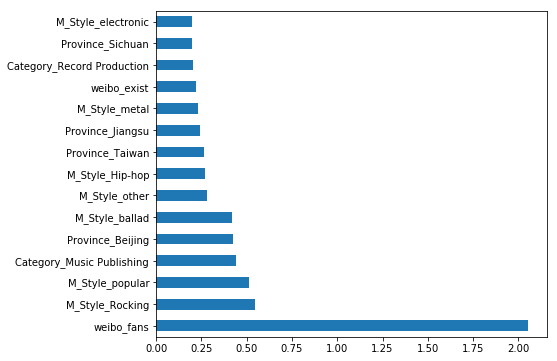

In [52]:
feature_importances = pd.Series(linear_svc.coef_.ravel(), index=features.columns)
feature_importances = feature_importances.abs().sort_values(ascending=False)
feature_importances[:15].plot(kind="barh", figsize=(7,6));

In [53]:
# CLASSIFICATIN REPORT
from sklearn.metrics import classification_report
y_pred = linear_svc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["project-over","project-succeed"]))

                 precision    recall  f1-score   support

   project-over       0.63      0.89      0.74       189
project-succeed       0.52      0.19      0.28       123

    avg / total       0.59      0.61      0.55       312



# Model 2) Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)  
lr.fit(X_train, y_train)

print("R^2 on training set: %f" % lr.score(X_train, y_train))
print("R^2 on testing set: %f" % lr.score(X_test, y_test))

R^2 on training set: 0.663994
R^2 on testing set: 0.605769


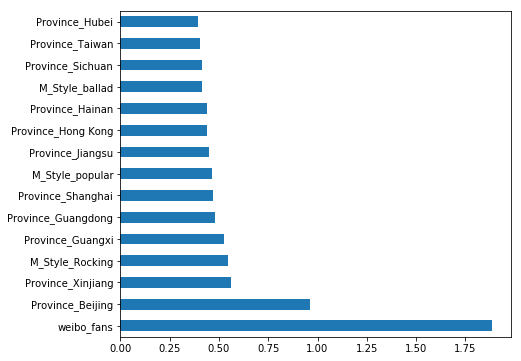

In [55]:
feature_importances = pd.Series(lr.coef_.ravel(), index=features.columns)
feature_importances = feature_importances.abs().sort_values(ascending=False)
feature_importances[:15].plot(kind="barh", figsize=(7,6));

# Model 3) Random Forest

### Random forest is the choosen algorithm for the final prediction as we have observed highest prediction accuracy with this algorithm among all the others.

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import grid_search

rf = RandomForestClassifier(n_estimators=400, n_jobs=-1)
parameters = {'max_features':['sqrt', 'log2'],
              'max_depth':[4,6]}

clf_grid = grid_search.GridSearchCV(rf, parameters)
clf_grid.fit(X_train, y_train)
rf.fit(X_train, y_train)
print('Training Score',rf.score(X_train, y_train))
print('testing Score',rf.score(X_test, y_test))

Training Score 1.0
testing Score 0.676282051282


In [57]:
print (clf_grid.best_params_)

{'max_depth': 6, 'max_features': 'sqrt'}


In [58]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=6,max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

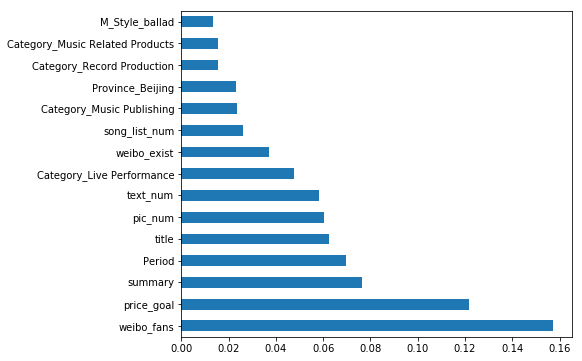

In [59]:
#Feature Importance
feature_importances = pd.Series(rf.feature_importances_.ravel(), index=features.columns)
feature_importances = feature_importances.abs().sort_values(ascending=False)
feature_importances[:15].plot(kind="barh", figsize=(7,6));

In [65]:
final['status_class_PREDICTED'] = rf.predict(features_scaled)
final.to_csv('C:/zhe/binary_prediction/Output20170904.csv', index= False)

In [60]:
# CLASSIFICATIN REPORT
rf.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["project-over","project-succeed"]))

                 precision    recall  f1-score   support

   project-over       0.63      0.98      0.77       189
project-succeed       0.83      0.12      0.21       123

    avg / total       0.71      0.64      0.55       312



# Model 4) Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import grid_search

dt = DecisionTreeClassifier()
parameters = {'max_features':['sqrt', 'log2'],
              'max_depth':[4,6,8]}

clf_grid = grid_search.GridSearchCV(dt, parameters)
clf_grid.fit(X_train, y_train)

print('Training Score',clf_grid.score(X_train, y_train))
print('testing Score',clf_grid.score(X_test, y_test))

Training Score 0.662389735365
testing Score 0.599358974359


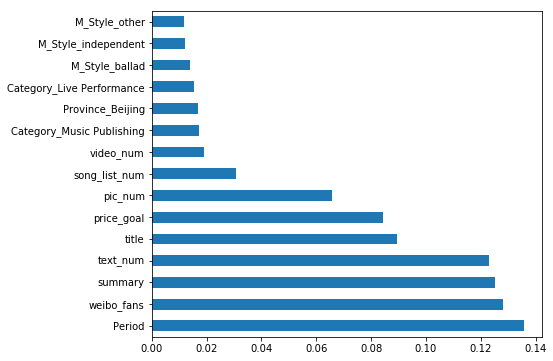

In [62]:
dt.fit(X_train, y_train)
feature_importances = pd.Series(dt.feature_importances_.ravel(), index=features.columns)
feature_importances = feature_importances.abs().sort_values(ascending=False)
feature_importances[:15].plot(kind="barh", figsize=(7,6));

In [63]:
# CLASSIFICATIN REPORT
rf.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["project-over","project-succeed"]))

                 precision    recall  f1-score   support

   project-over       0.66      0.66      0.66       189
project-succeed       0.48      0.49      0.48       123

    avg / total       0.59      0.59      0.59       312



# Algorithm Comparison

LR: 0.630303 (0.036166)
RF: 0.633510 (0.035843)
SVC: 0.627910 (0.037241)
DT: 0.591794 (0.025053)


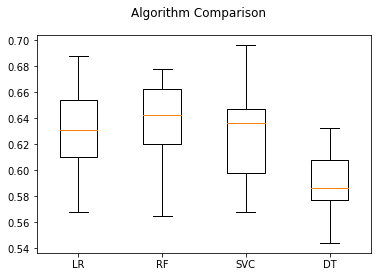

In [64]:
from sklearn import model_selection
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', LinearSVC()))
models.append(('DT', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()